<a href="https://colab.research.google.com/github/Glow05/IS-Project/blob/main/GlowApp_ImageClassification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import some libraries

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()



### Preparation and Grabbing of the Dataset









In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/archive.zip

Archive:  /content/gdrive/MyDrive/archive.zip
replace Household_ds/baskets/Image_1.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Household_ds/baskets/Image_1.jpeg  
  inflating: Household_ds/baskets/Image_10.jpeg  
  inflating: Household_ds/baskets/Image_100.jpg  
  inflating: Household_ds/baskets/Image_101.jpg  
  inflating: Household_ds/baskets/Image_102.jpg  
  inflating: Household_ds/baskets/Image_103.jpeg  
  inflating: Household_ds/baskets/Image_104.jpg  
  inflating: Household_ds/baskets/Image_105.jpg  
  inflating: Household_ds/baskets/Image_106.jpg  
  inflating: Household_ds/baskets/Image_107.jpeg  
  inflating: Household_ds/baskets/Image_108.jpg  
  inflating: Household_ds/baskets/Image_109.jpg  
  inflating: Household_ds/baskets/Image_11.jpeg  
  inflating: Household_ds/baskets/Image_110.jpeg  
  inflating: Household_ds/baskets/Image_111.jpg  
  inflating: Household_ds/baskets/Image_112.png  
  inflating: Household_ds/baskets/Image_113.jpeg  
  inflating: House

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt
import glob
import numpy as np

In [ ]:
import os
#os.listdir(os.getcwd())

### Data Cleaning

In [ ]:
from pathlib import Path
import imghdr
import os

image_extensions = [".png", ".jpg", ".bmp", ".gif", ".jpeg", ".webp"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

for images in Path("/content/Household_ds").rglob("*"):
    if images.suffix.lower() in image_extensions:
        img_type = imghdr.what(images)
        if img_type is None:
            print(f"{images} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            #print(f"{images} is a {img_type}, not accepted by TensorFlow")
            os.remove(f"{images}")

### Assigning Labels and defining the Classes

In [ ]:
img_height, img_width = 32, 32
batch_size = 32

baskets = glob.glob('Household_ds/baskets/*.*')
cups = glob.glob('Household_ds/cups/*.*')
mats = glob.glob('Household_ds/mats/*.*')
plates = glob.glob('Household_ds/plates/*.*')
sofas = glob.glob('Household_ds/sofas/*.*')
spoons = glob.glob('Household_ds/spoons/*.*')
towels = glob.glob('Household_ds/towels/*.*')
water_buckets = glob.glob('Household_ds/water_buckets/*.*')


data = []
labels = []

#classes = [baskets, cups, mats, plates, sofas, spoons, towels, water_buckets]
classes = [baskets, mats, sofas, towels, water_buckets]
print(classes)

index = 0
for category in classes:
  for i in category:
         
      image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
      target_size= (img_width,img_height))
      image=np.array(image)
      data.append(image)
      labels.append(index)
  index += 1


data = np.array(data)
labels = np.array(labels)


In [ ]:
from keras.utils import np_utils
Y = np_utils.to_categorical(labels, 5)

### Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
#x,y = shuffle(data,Y, random_state=2)
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.3,
                                                random_state=42)

In [ ]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (2157, 32, 32)
X_test shape = (925, 32, 32)


### Visualization of an Image

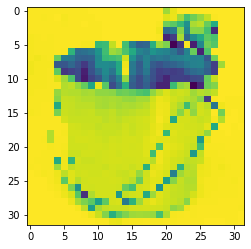

In [ ]:
image = X_train[1313,:].reshape((32,32))
plt.imshow(image)
plt.show()

### Designing a CNN Model in Keras

In [ ]:
#Initialising the input shape
#input_shape=data[0].shape
#print(input_shape)

In [ ]:
#Designing the CNN Sequential Model
model = tf.keras.Sequential(
    [
      
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu",data_format = 'channels_last' ),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(16, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(32, activation="relu"),
     tf.keras.layers.Dense(16, activation="relu"),
     
     tf.keras.layers.Dense(5, activation="softmax"),
    ]
)

### Compiling the Model

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

### Training and Validation of the Model

In [ ]:
X_train = np.array(X_train).reshape(-1,32,32,1)
#ytrain = np.array(ytrain).reshape(-1,32,32,1)
hist = model.fit(
   X_train, ytrain,
    batch_size = 16,
    epochs = 15,
    verbose=1, 
    validation_data=(X_test, ytest)
)

Epoch 1/15
135/135 [==============================] - 9s 67ms/step - loss: 1.2955 - accuracy: 0.4349 - val_loss: 1.0944 - val_accuracy: 0.5146
Epoch 2/15
135/135 [==============================] - 9s 64ms/step - loss: 0.9846 - accuracy: 0.5642 - val_loss: 0.9683 - val_accuracy: 0.5859
Epoch 3/15
135/135 [==============================] - 9s 63ms/step - loss: 0.9309 - accuracy: 0.6096 - val_loss: 0.9707 - val_accuracy: 0.5730
Epoch 4/15
135/135 [==============================] - 10s 75ms/step - loss: 0.8947 - accuracy: 0.6236 - val_loss: 0.9576 - val_accuracy: 0.5914
Epoch 5/15
135/135 [==============================] - 9s 67ms/step - loss: 0.8744 - accuracy: 0.6305 - val_loss: 0.9918 - val_accuracy: 0.5622
Epoch 6/15
135/135 [==============================] - 9s 65ms/step - loss: 0.8431 - accuracy: 0.6504 - val_loss: 0.9454 - val_accuracy: 0.6097
Epoch 7/15
135/135 [==============================] - 9s 66ms/step - loss: 0.8237 - accuracy: 0.6671 - val_loss: 0.8918 - val_accuracy: 0.645

### Checking the Accuracy

In [ ]:
model.evaluate(X_train,ytrain)

68/68 [==============================] - 2s 35ms/step - loss: 0.5669 - accuracy: 0.7798


[0.5668725967407227, 0.7797867655754089]

### View Model Configuration

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0

### Plotting the Accuracy and Loss Curve


In [ ]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(15)

### Visualizing the Training Loss and Validation Loss

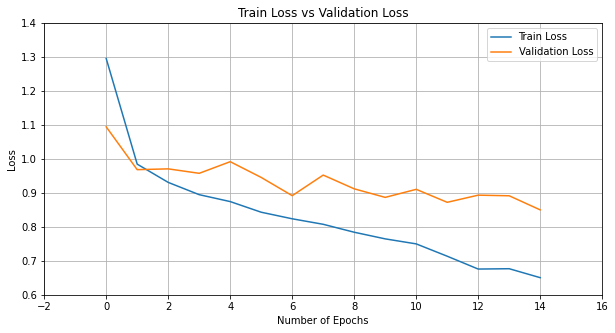

In [ ]:
plt.figure(1,figsize=(10, 5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])

### Visualizing Training Accuracy & Validation Accuracy

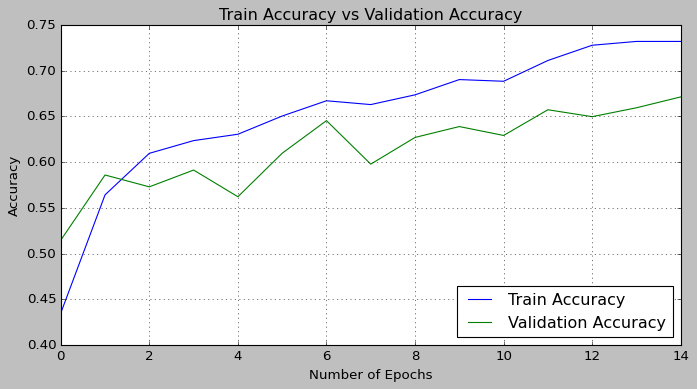

In [ ]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

### Evaluating the model & Predicting the output class of a test image

In [ ]:
score = model.evaluate(X_test, ytest, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.8499250411987305
Test Accuracy: 0.6713513731956482


### Use of a test image and predicting the probability 

In [ ]:
test_img = cv2.imread('Household_ds/sofas/514.jpg')
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(test_img,(32,32))
test_img = np.array(test_img)
test_img = test_img.astype('float32')
test_img /= 255
print(test_img.shape)

(32, 32)


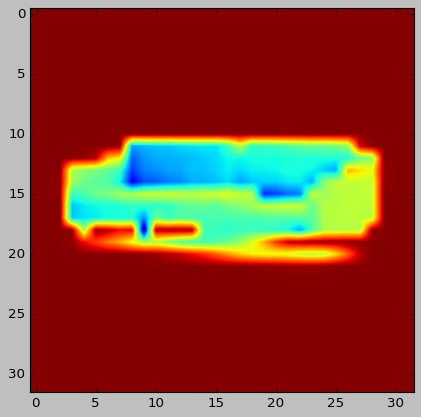

In [ ]:
image = test_img.reshape((32,32))
plt.imshow(image)
plt.show()

In [ ]:
classes = ["baskets", "mats", "sofas", "towels", "water_buckets"]
image=tf.keras.preprocessing.image.load_img("Household_ds/sofas/514.jpg", color_mode='grayscale', target_size= (img_width,img_height))
image=np.array(image)
image = np.array(image).reshape(1,32,32,1)
prediction=classes[np.argmax(model.predict(image))]
print(prediction)

1/1 [==============================] - 0s 57ms/step
sofas


In [ ]:
test_image = X_test[0:1]
print (test_image.shape)
print(model.predict(test_image))
#print(model.predict_classes(test_image))
print(ytest[0:1])

image = test_image.reshape((32,32))
plt.imshow(image)
plt.show()

### Converting the Model to a Tflite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

### Print the confusion matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Print the confusion matrix
Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)
target_names=['Class 0 (baskets)', 'Class 1 (mats)', 'Class 2 (sofas)', 'Class 3 (towels)',
              'Class 4 (water_buckets)']
#print(classification_report(np.argmax(ytest,axis=1),y_pred,target_names=target_names))

#classes = ["baskets", "mats", "sofas", "towels", "water_buckets"]

29/29 [==============================] - 1s 36ms/step
[[2.3473866e-02 2.1655297e-02 9.2491091e-06 8.3947368e-03 9.4646680e-01]
 [3.0188136e-02 1.5624379e-01 3.2779835e-03 4.8058850e-01 3.2970157e-01]
 [1.9845992e-02 1.9745001e-01 2.1832713e-05 7.2820359e-01 5.4478560e-02]
 ...
 [5.4999855e-03 5.9735551e-02 9.2633115e-03 8.6578268e-01 5.9718523e-02]
 [7.9949296e-01 8.2003558e-03 1.1713394e-04 3.4107305e-02 1.5808220e-01]
 [3.1450801e-02 3.6472356e-01 1.6118163e-05 4.9515378e-01 1.0865574e-01]]
[4 3 3 0 2 3 0 1 3 0 0 0 3 2 0 2 0 1 2 4 2 4 3 1 0 2 3 1 2 0 4 2 3 0 1 0 1
 3 3 0 2 3 4 1 0 1 3 2 0 2 1 1 2 1 3 3 3 4 0 0 1 3 0 4 1 0 2 0 4 0 1 2 3 2
 1 2 0 4 3 0 4 1 1 3 1 3 0 4 3 1 0 0 4 0 0 1 0 1 3 0 4 1 0 0 1 4 2 3 4 3 2
 0 0 0 4 2 3 4 2 3 1 1 1 3 0 3 2 0 2 2 2 3 0 1 3 0 0 0 3 4 3 0 0 0 3 0 0 2
 3 0 1 0 2 0 1 0 2 0 0 3 4 0 2 3 0 3 0 2 0 0 2 1 0 1 4 2 4 4 2 1 2 4 1 1 4
 2 3 4 1 3 3 0 3 3 1 2 3 4 0 0 0 3 4 3 4 0 3 2 0 3 3 3 1 3 3 0 4 3 2 2 3 1
 3 0 2 1 1 1 3 0 0 2 1 3 1 0 4 4 3 3 2 0 0 3 3 0 2 2

In [ ]:
print(classification_report(np.argmax(ytest,axis=0),y_pred,target_names=target_names))

TypeError: ignored